In [64]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [65]:
nltk.download('punkt')

words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('health.json').read()
intents = json.loads(data_file)

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
for intent in intents['diseases']:
    for pattern in intent['symptoms']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['name']))
        if intent['name'] not in classes:
            classes.append(intent['name'])

In [68]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))


In [69]:
pickle.dump(words, open('words_dnn.pkl', 'wb'))
pickle.dump(classes, open('classes_dnn.pkl', 'wb'))

In [70]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([np.array(bag), np.array(output_row)])


In [71]:
train_x = np.array([item[0] for item in training])
train_y = np.array([item[1] for item in training])

model_dnn = Sequential()
model_dnn.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_dnn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


Epoch 1/200
313/313 [==============================] - 2s 4ms/step - loss: 5.6116 - accuracy: 0.0045
Epoch 2/200
313/313 [==============================] - 1s 4ms/step - loss: 5.5902 - accuracy: 0.0096
Epoch 3/200
313/313 [==============================] - 1s 5ms/step - loss: 5.5683 - accuracy: 0.0102
Epoch 4/200
313/313 [==============================] - 1s 4ms/step - loss: 5.5545 - accuracy: 0.0115
Epoch 5/200
313/313 [==============================] - 1s 4ms/step - loss: 5.5318 - accuracy: 0.0141
Epoch 6/200
313/313 [==============================] - 1s 4ms/step - loss: 5.5004 - accuracy: 0.0173
Epoch 7/200
313/313 [==============================] - 1s 4ms/step - loss: 5.4536 - accuracy: 0.0179
Epoch 8/200
313/313 [==============================] - 1s 4ms/step - loss: 5.4109 - accuracy: 0.0141
Epoch 9/200
313/313 [==============================] - 1s 4ms/step - loss: 5.3644 - accuracy: 0.0205
Epoch 10/200
313/313 [==============================] - 1s 4ms/step - loss: 5.2972 - accura

313/313 [==============================] - 1s 4ms/step - loss: 3.3906 - accuracy: 0.2031
Epoch 82/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3629 - accuracy: 0.2217
Epoch 83/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3613 - accuracy: 0.2108
Epoch 84/200
313/313 [==============================] - 1s 4ms/step - loss: 3.4070 - accuracy: 0.2012
Epoch 85/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3654 - accuracy: 0.2082
Epoch 86/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3826 - accuracy: 0.2184
Epoch 87/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2911 - accuracy: 0.2217
Epoch 88/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3105 - accuracy: 0.2146
Epoch 89/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2968 - accuracy: 0.2178
Epoch 90/200
313/313 [==============================] - 1s 4ms/step - loss: 3.3389 - accuracy: 

313/313 [==============================] - 1s 4ms/step - loss: 3.2126 - accuracy: 0.2389
Epoch 161/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2443 - accuracy: 0.2396
Epoch 162/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2052 - accuracy: 0.2357
Epoch 163/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2072 - accuracy: 0.2389
Epoch 164/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2019 - accuracy: 0.2492
Epoch 165/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2510 - accuracy: 0.2287
Epoch 166/200
313/313 [==============================] - 1s 4ms/step - loss: 3.1591 - accuracy: 0.2505
Epoch 167/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2360 - accuracy: 0.2524
Epoch 168/200
313/313 [==============================] - 1s 4ms/step - loss: 3.1437 - accuracy: 0.2665
Epoch 169/200
313/313 [==============================] - 1s 4ms/step - loss: 3.2674 - a

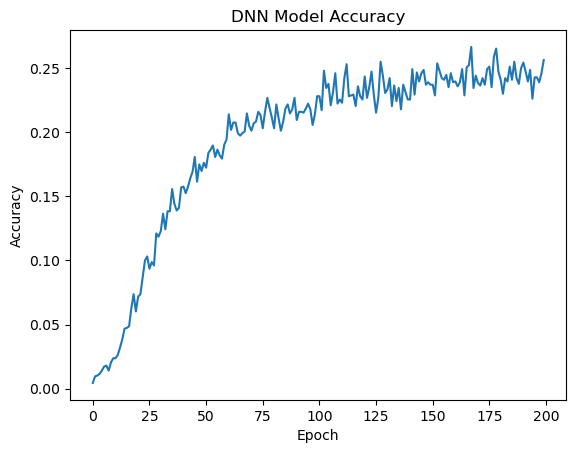

DNN Model created


In [72]:
hist_dnn = model_dnn.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)
final_training_accuracy_dnn = hist_dnn.history['accuracy'][-1]
print(f'DNN Model - Final Training Accuracy: {final_training_accuracy_dnn * 100:.2f}%')

plt.plot(hist_dnn.history['accuracy'])
plt.title('DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

model_dnn.save('chatbot_model_dnn.h5', hist_dnn)
print("DNN Model created")

In [80]:
data_file = open('health.json').read()
diseases_data = json.loads(data_file)

lemmatizer = WordNetLemmatizer()

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)  
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(symptoms, model, diseases):
    p = bow(' '.join(symptoms), words, show_details=False)
    res = model.predict(np.array([p]))[0]
    predicted_class_index = np.argmax(res)

    disease_name = classes[predicted_class_index]
    disease_info = next(item for item in diseases['diseases'] if item["name"] == disease_name)

    return disease_name, disease_info["description"], disease_info["treatments"]


In [83]:
input_symptoms = ["who are you",
          "what are you",
          "tell me about yourself",
          "what can you do",
          "help",
          "need help",
          "can you help me"]
predicted_disease, description, treatments = predict_class(input_symptoms, model_dnn, diseases_data)
print(f"Predicted Disease: {predicted_disease}")
print(f"Description: {description}")
print(f"Treatments: {', '.join(treatments)}")


1/1 [==============================] - 0s 39ms/step
Predicted Disease: about_you
Description: 
Treatments: I'm Pulse, a symptom checker and healthcare assistant. I'm here to help you identify and better understand your symptoms, and provide you with personalized guidance on next steps.
